### Pre-requisite

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
train_path = 'train.csv'
val_path   = 'validation.csv'
test_path  = 'test.csv'

In [3]:
df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)
df_test = pd.read_csv(test_path)

In [4]:
combined_df = pd.concat([df_train, df_val, df_test], ignore_index=True)

### Dataset Information

combined_df.info()

In [5]:
combined_df.head(20)

,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
0,17,12,Female,White,3,HS,Public,Suburban,70.258235,79.665185,...,2.743879,0.906809,1.089243,1,1,0,0,0,2,2
1,18,12,Female,White,2,HS,Public,Suburban,67.876546,59.611505,...,2.587700,0.843739,0.879911,1,1,0,1,0,5,2
2,16,11,Female,White,2,HS,Public,City,62.070623,70.577443,...,2.426294,0.850923,1.003442,1,1,0,1,1,5,1
3,14,9,Female,White,4,Bachelors+,Public,Town,79.909312,82.924450,...,3.558240,0.946786,1.814810,1,1,0,1,0,4,2
4,16,11,Female,Two-or-more,4,SomeCollege,Public,Rural,90.562294,95.352336,...,3.896884,0.988036,1.157241,1,1,0,0,0,3,4
5,14,9,Female,Hispanic,1,SomeCollege,Public,Suburban,74.323709,77.639839,...,2.728882,0.875276,0.800096,1,1,0,0,0,2,2
6,16,11,Female,Black,1,SomeCollege,Private,Suburban,62.068741,71.367186,...,3.058144,0.880969,0.785428,1,0,0,1,0,3,2
7,18,12,Female,White,1,HS,Public,Suburban,73.280029,62.164448,...,2.878577,0.913663,1.533874,1,1,1,0,0,4,1
8,18,12,Female,Hispanic,1,<HS,Public,Suburban,60.588339,74.419737,...,2.841019,0.849471,0.985229,1,1,0,0,1,2,4
9,16,11,Female,White,3,HS,Public,Suburban,73.169137,80.831831,...,2.856098,0.914255,1.088166,1,0,0,0,0,3,3


### Data Cleaning and Preprocessing

In [6]:
print("Original shape:", combined_df.shape)
print("\nColumns:\n", combined_df.columns)
print("\nMissing values:\n", combined_df.isnull().sum())
combined_df.info()

Original shape: (10000000, 21)

Columns:
 Index(['Age', 'Grade', 'Gender', 'Race', 'SES_Quartile', 'ParentalEducation',
       'SchoolType', 'Locale', 'TestScore_Math', 'TestScore_Reading',
       'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours',
       'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport',
       'Romantic', 'FreeTime', 'GoOut'],
      dtype='object')

Missing values:
 Age                  0
Grade                0
Gender               0
Race                 0
SES_Quartile         0
ParentalEducation    0
SchoolType           0
Locale               0
TestScore_Math       0
TestScore_Reading    0
TestScore_Science    0
GPA                  0
AttendanceRate       0
StudyHours           0
InternetAccess       0
Extracurricular      0
PartTimeJob          0
ParentSupport        0
Romantic             0
FreeTime             0
GoOut                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data colu

In [7]:
num_duplicates = combined_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [8]:
cleaned_df = combined_df.copy()

label_enc = LabelEncoder()
cat_cols = ['Gender', 'Race', 'ParentalEducation', 'SchoolType', 'Locale']

for col in cat_cols:
    cleaned_df[col] = label_enc.fit_transform(cleaned_df[col])
    mapping = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))
    print(f"Label mapping for {col}: {mapping}")

Label mapping for Gender: {'Female': 0, 'Male': 1}
Label mapping for Race: {'Asian': 0, 'Black': 1, 'Hispanic': 2, 'Other': 3, 'Two-or-more': 4, 'White': 5}
Label mapping for ParentalEducation: {'<HS': 0, 'Bachelors+': 1, 'HS': 2, 'SomeCollege': 3}
Label mapping for SchoolType: {'Private': 0, 'Public': 1}
Label mapping for Locale: {'City': 0, 'Rural': 1, 'Suburban': 2, 'Town': 3}


### Exploratory Data Analysis

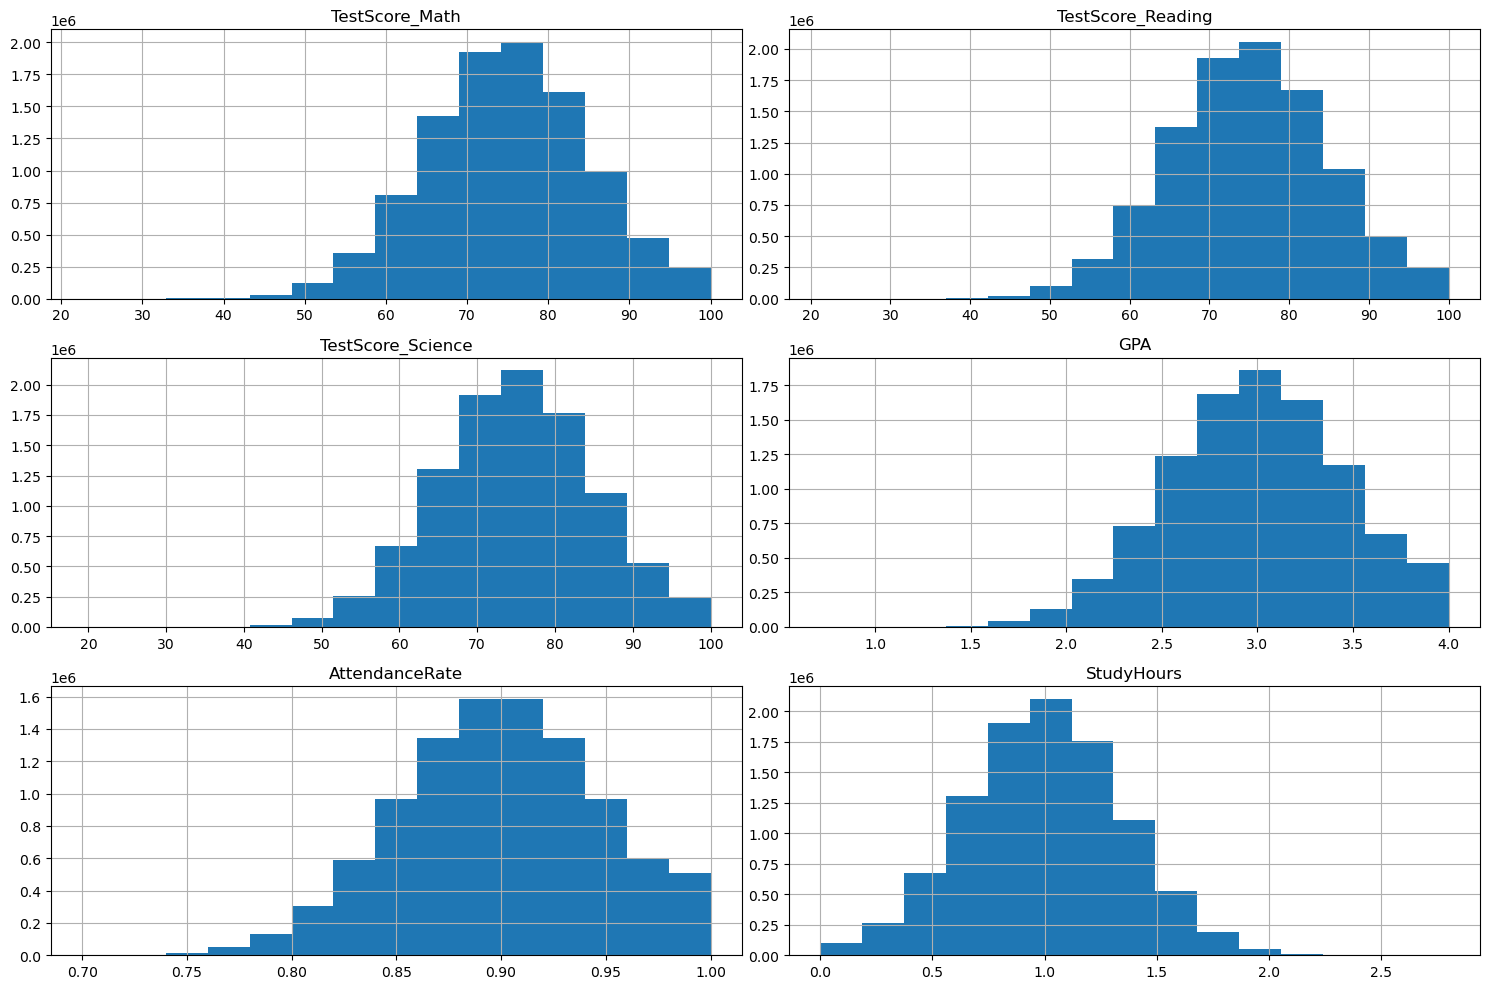

Statistical Summary of Numerical Features:
       TestScore_Math  TestScore_Reading  TestScore_Science           GPA  \
count    1.000000e+07       1.000000e+07       1.000000e+07  1.000000e+07   
mean     7.497538e+01       7.497966e+01       7.497925e+01  2.996769e+00   
std      9.945743e+00       9.944393e+00       9.948699e+00  4.595502e-01   
min      2.257681e+01       2.118797e+01       1.918883e+01  7.131814e-01   
25%      6.824556e+01       6.825318e+01       6.825599e+01  2.685058e+00   
50%      7.499616e+01       7.500062e+01       7.500084e+01  2.999878e+00   
75%      8.174271e+01       8.174398e+01       8.174257e+01  3.314462e+00   
max      1.000000e+02       1.000000e+02       1.000000e+02  4.000000e+00   

       AttendanceRate    StudyHours  
count    1.000000e+07  1.000000e+07  
mean     8.995845e-01  9.998080e-01  
std      4.805824e-02  3.481654e-01  
min      7.000000e-01  0.000000e+00  
25%      8.669499e-01  7.642423e-01  
50%      8.999669e-01  9.999166e-01

C:\Users\oldma\AppData\Local\Temp\ipykernel_66572\2781782581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_df, x=col, palette="pastel")


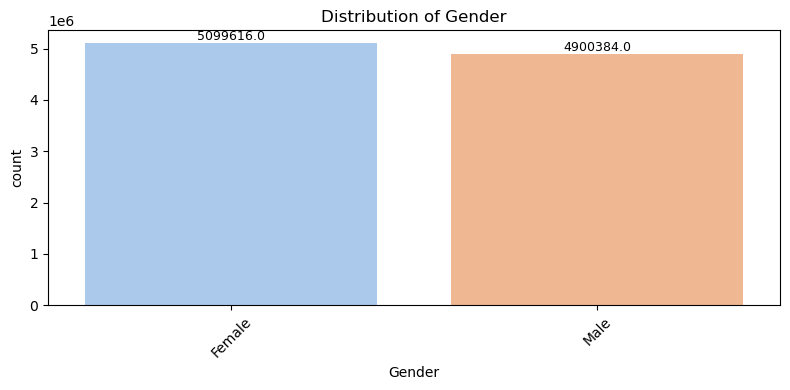

C:\Users\oldma\AppData\Local\Temp\ipykernel_66572\2781782581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_df, x=col, palette="pastel")


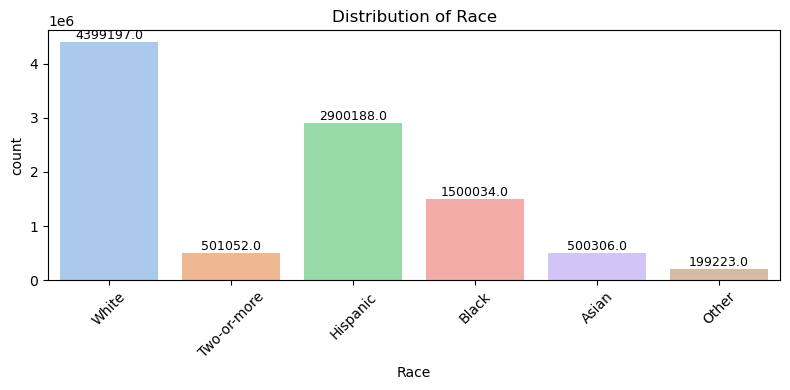

C:\Users\oldma\AppData\Local\Temp\ipykernel_66572\2781782581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_df, x=col, palette="pastel")


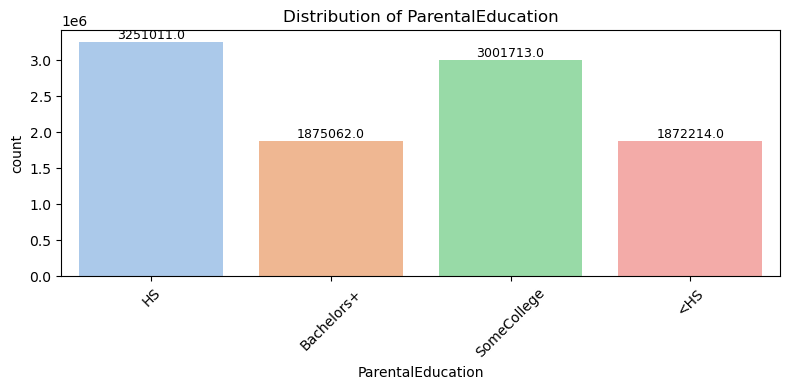

C:\Users\oldma\AppData\Local\Temp\ipykernel_66572\2781782581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_df, x=col, palette="pastel")


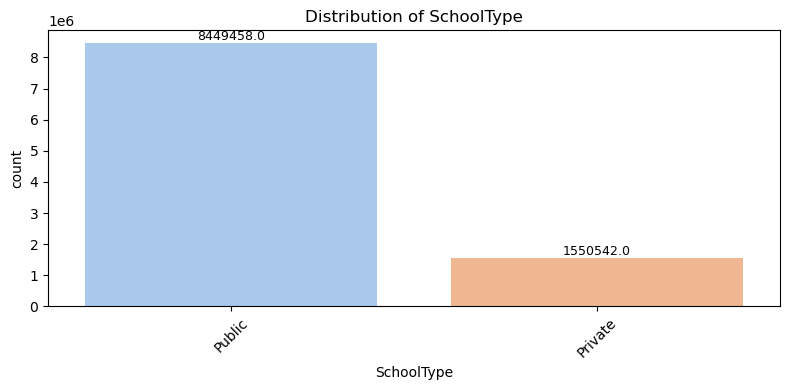

C:\Users\oldma\AppData\Local\Temp\ipykernel_66572\2781782581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_df, x=col, palette="pastel")


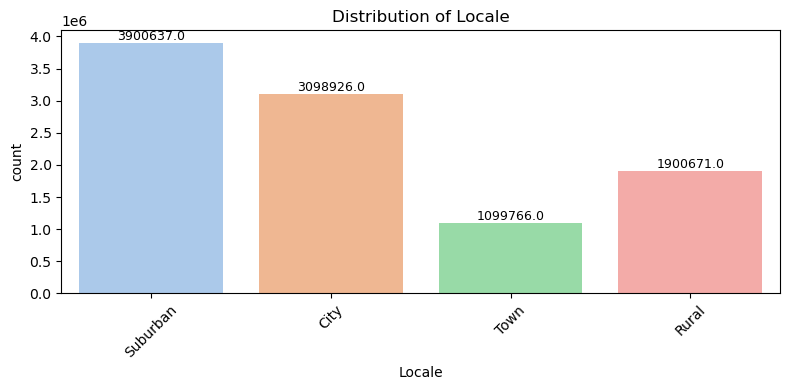

In [ ]:
num_cols = ['TestScore_Math', 'TestScore_Reading', 'TestScore_Science',
            'GPA', 'AttendanceRate', 'StudyHours']

# Histograms for numerical features
combined_df[num_cols].hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

print("Statistical Summary of Numerical Features:")
print(combined_df[num_cols].describe())

# Bar plots for categorical features
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=combined_df, x=col, hue=col, palette="pastel", legend=False)

    # Add value labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


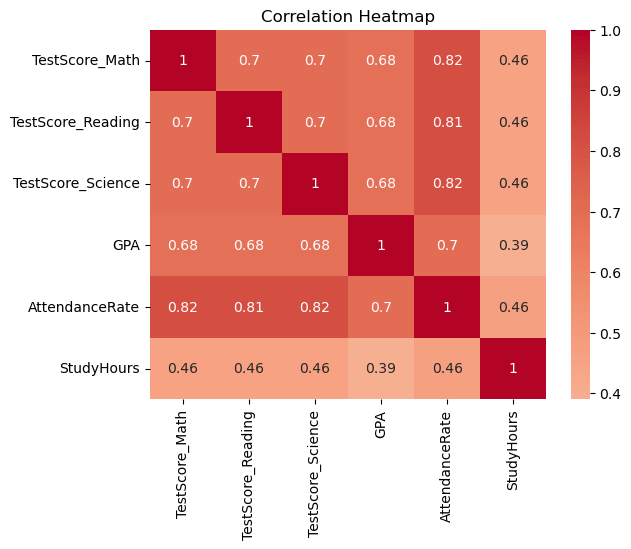

In [10]:
corr_matrix = combined_df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()



Statistics for 'GPA' grouped by 'Gender':

            count  mean   std   min   25%  50%   75%  max
Gender                                                   
Female  5099616.0   3.0  0.46  0.71  2.69  3.0  3.31  4.0
Male    4900384.0   3.0  0.46  0.75  2.69  3.0  3.31  4.0


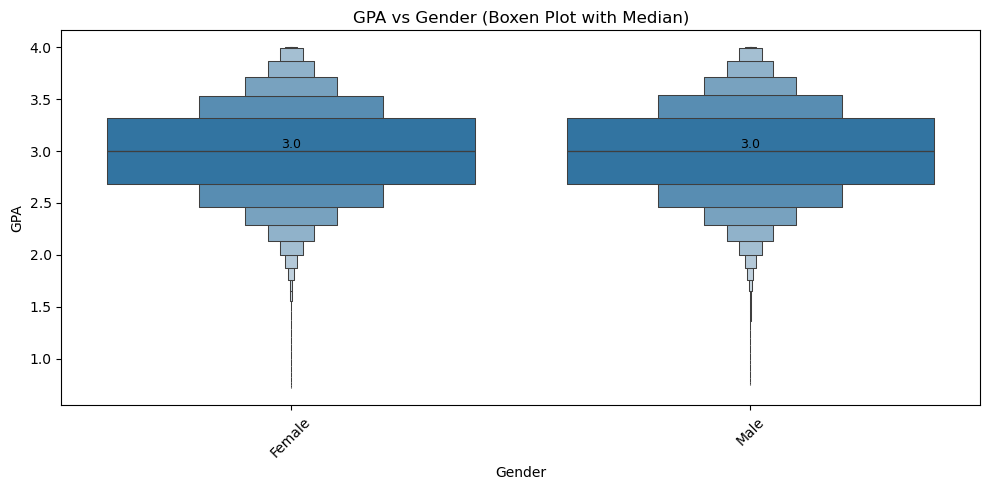


Statistics for 'GPA' grouped by 'Race':

                 count  mean   std   min   25%  50%   75%  max
Race                                                          
Asian         500306.0   3.0  0.46  0.79  2.69  3.0  3.31  4.0
Black        1500034.0   3.0  0.46  0.79  2.68  3.0  3.31  4.0
Hispanic     2900188.0   3.0  0.46  0.76  2.68  3.0  3.31  4.0
Other         199223.0   3.0  0.46  0.75  2.69  3.0  3.32  4.0
Two-or-more   501052.0   3.0  0.46  0.87  2.68  3.0  3.31  4.0
White        4399197.0   3.0  0.46  0.71  2.69  3.0  3.31  4.0


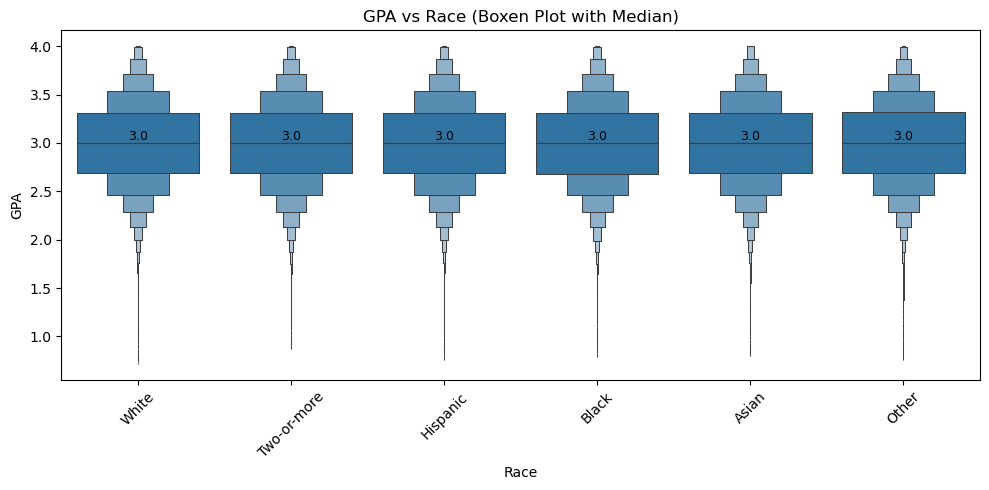


Statistics for 'GPA' grouped by 'ParentalEducation':

                       count  mean   std   min   25%  50%   75%  max
ParentalEducation                                                   
<HS                1872214.0   3.0  0.46  0.71  2.68  3.0  3.31  4.0
Bachelors+         1875062.0   3.0  0.46  0.84  2.69  3.0  3.31  4.0
HS                 3251011.0   3.0  0.46  0.76  2.69  3.0  3.31  4.0
SomeCollege        3001713.0   3.0  0.46  0.74  2.68  3.0  3.31  4.0


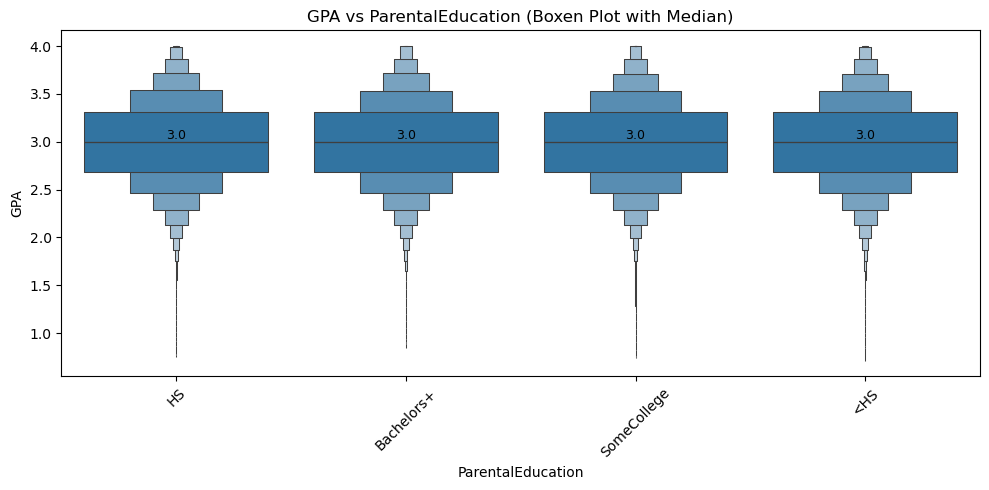


Statistics for 'GPA' grouped by 'SchoolType':

                count  mean   std   min   25%  50%   75%  max
SchoolType                                                   
Private     1550542.0   3.0  0.46  0.76  2.69  3.0  3.31  4.0
Public      8449458.0   3.0  0.46  0.71  2.69  3.0  3.31  4.0


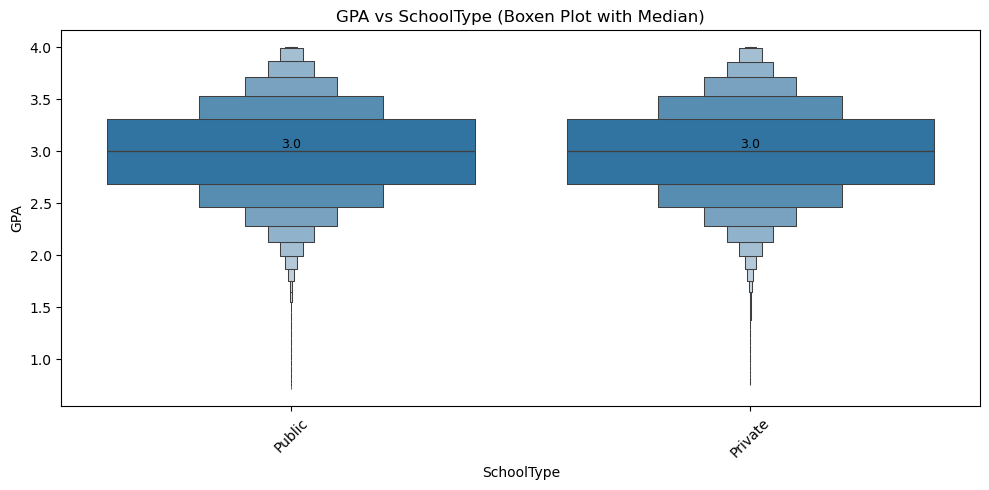


Statistics for 'GPA' grouped by 'Locale':

              count  mean   std   min   25%  50%   75%  max
Locale                                                     
City      3098926.0   3.0  0.46  0.74  2.69  3.0  3.31  4.0
Rural     1900671.0   3.0  0.46  0.75  2.69  3.0  3.32  4.0
Suburban  3900637.0   3.0  0.46  0.71  2.69  3.0  3.31  4.0
Town      1099766.0   3.0  0.46  0.75  2.68  3.0  3.31  4.0


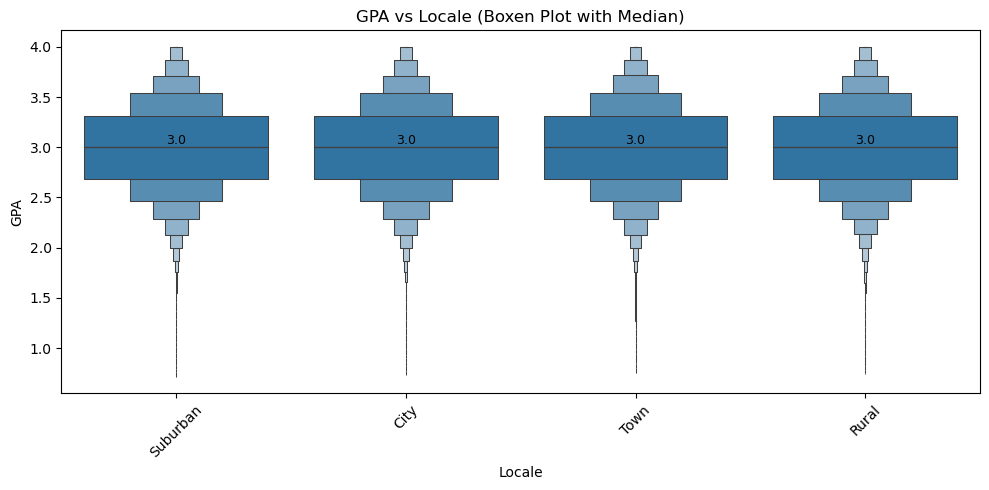

In [11]:
for cat in cat_cols:
    for num in ['GPA']:
        # 1. Print Statistical Summary
        print(f"\nStatistics for '{num}' grouped by '{cat}':\n")
        stats = combined_df.groupby(cat)[num].describe().round(2)
        print(stats)

        # 2. Plot Boxen Plot
        plt.figure(figsize=(10, 5))
        ax = sns.boxenplot(data=combined_df, x=cat, y=num, k_depth='full')

        # Annotate Medians
        xtick_labels = [t.get_text() for t in ax.get_xticklabels()]
        medians = combined_df.groupby(cat)[num].median()

        for i, label in enumerate(xtick_labels):
            if label in medians:
                val = round(medians[label], 2)
                ax.text(i, val, f'{val}', ha='center', va='bottom', color='black', fontsize=9)

        plt.title(f'{num} vs {cat} (Boxen Plot with Median)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

### Research Question